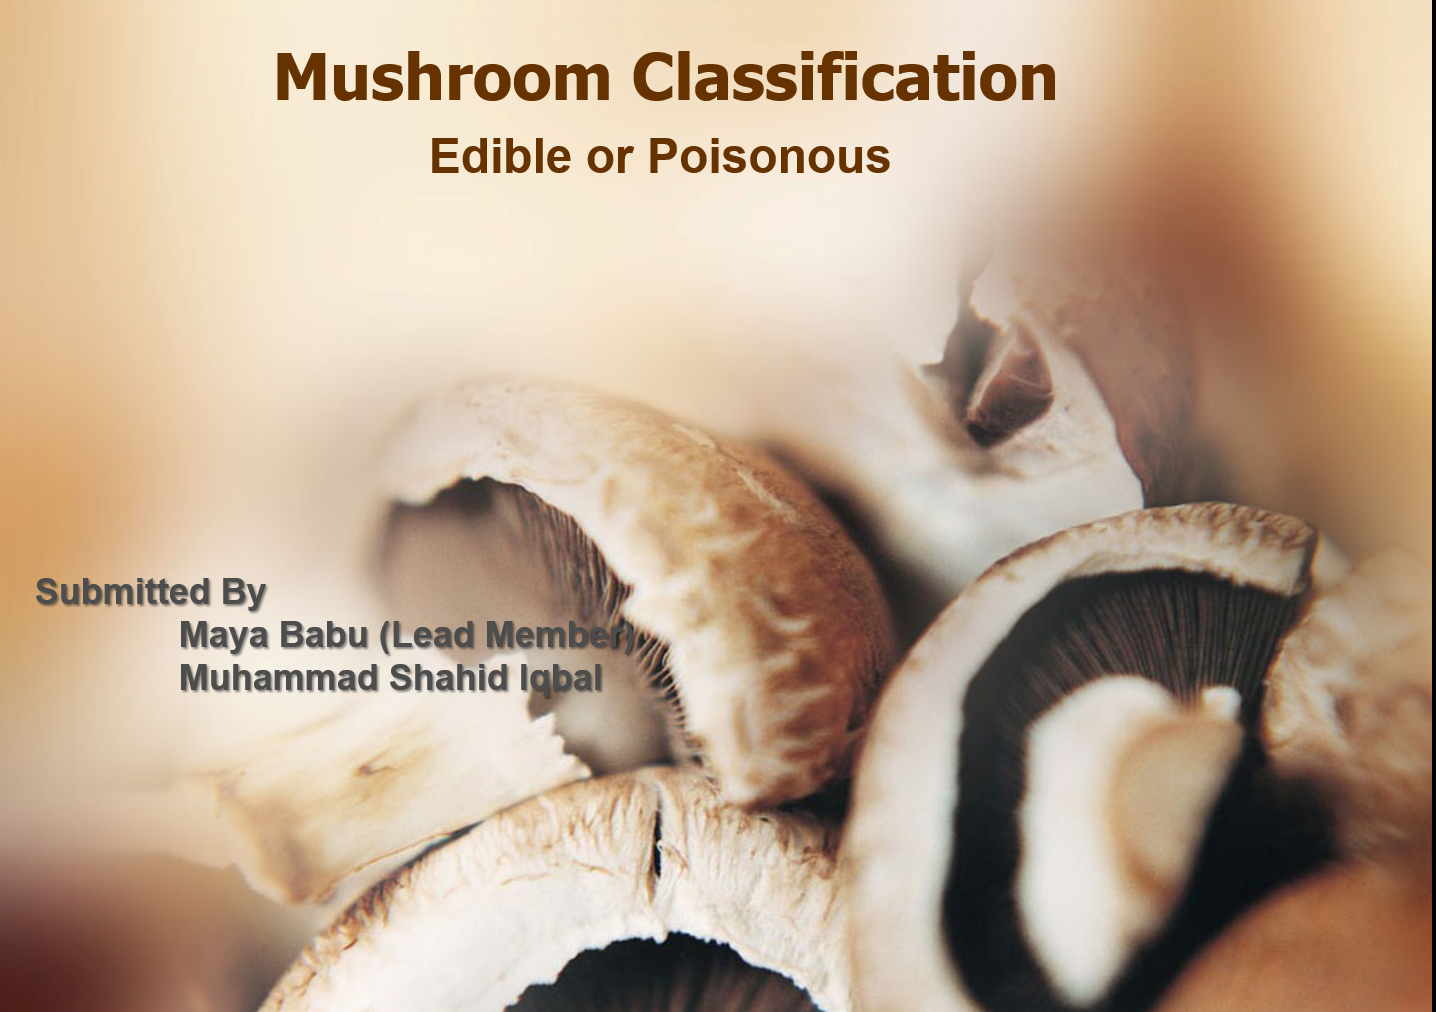

## Problem Assessment

To detect if the mushroom is edible or poisonous by its specifications like cap shape, cap color, gill color, etc. using different classifiers.

## Executive Summary

This project aimed to develop a model that will help automate the classification of mushroom species. The mushroom dataset, obtained from the UCI Machine Learning Repository, was split into training and test subsets and multiple classification models were implemented for identifying mushrooms as edible or poisonous.  During a method comparison for efficiency and accuracy, a Decision Tree Model was determined to be the most viable model for the purposes of this project. 


## Data set

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

## Data Dictionary

Attribute Information: (classes: edible=e, poisonous=p)

- cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s (6 distinct values)
- cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s (4 distinct values)
- cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u,red=e, white=w, yellow=y (10 distinct values)
- bruises: bruises=t, no=f (2 distinct values)
- odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n,pungent=p, spicy=s (9 distinct values)
- gill-attachment: attached=a, descending=d, free=f, notched=n (4 distinct values)
- gill-spacing: close=c, crowded=w, distant=d (3 distinct values)
- gill-size: broad=b, narrow=n (2 distinct values)
- gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y (12 distinct values)
- stalk-shape: enlarging=e, tapering=t (2 distinct values)
- stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? (7 distinct values)
- stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s (4 distinct values)
- stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s (4 distinct values)
- stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y (9 distinct values)
- stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y (9 distinct values)
- veil-type: partial=p, universal=u (2 distinct values)
- veil-color: brown=n, orange=o, white=w, yellow=y (4 distinct values)
- ring-number: none=n, one=o, two=t (3 distinct values)
- ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p,sheathing=s, zone=z (8 distinct values)
- spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o,purple=u, white=w, yellow=y (9 distinct values)
- population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y (6 distinct values)
- habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d (7 distinct values)

### Importing the necessary libraries

In [6]:
# Imports the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
set_config(display='diagram')
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay


### Importing Data

In [7]:
#Load the data into Python
mushrooms_df = pd.read_csv('mushrooms.csv')

In [8]:
#to display all the column names
pd.set_option('display.max_columns',None)
mushrooms_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [9]:
# Get an overview of the mushroom dataset.
mushrooms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## Data Preprocessing

In [10]:
# Check for duplicated entries in the dataset.
mushrooms_df.duplicated().sum()

0

In [11]:
# Check for missing values in each column.
mushrooms_df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [12]:
# Check the number of rows and columns in this dataset.
mushrooms_df.shape

(8124, 23)

- So far, no duplicated entries or missing values in the dataset.
- The target variable is the classification of the mushroom as either edible or poisonous ('class' column).
- There are 8124 entries and 22 features in this dataset.

In [13]:
# Determine the number of unique values in each column of the dataset.
n = mushrooms_df.nunique(axis=0)

# Print a list of columns and the corresponding unique values.
print("No.of.unique values in each column :\n",n)

pd.set_option('display.max_rows', 10)

No.of.unique values in each column :
 class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64


In [14]:
# to create an index of categorical variables.
# str_cols contains the columns in the object datatype.

dtypes = mushrooms_df.dtypes
str_cols = dtypes[dtypes == 'object'].index
str_cols

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [17]:
# Check the value counts of the class column.
mushrooms_df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [18]:
# Check the value counts of the class column with normalization.
mushrooms_df['class'].value_counts(normalize = True)

class
e    0.517971
p    0.482029
Name: proportion, dtype: float64

- The dataset is fairly balanced.

## Exploratory Data Analysis

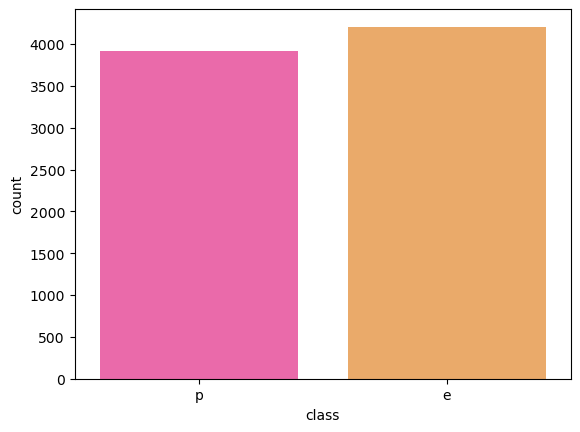

In [19]:
#Visualising the count of edible and poisonous mushrooms
sns.countplot(x='class',data=mushrooms_df,palette='spring')
plt.show()

class
e    4208
p    3916
Name: count, dtype: int64


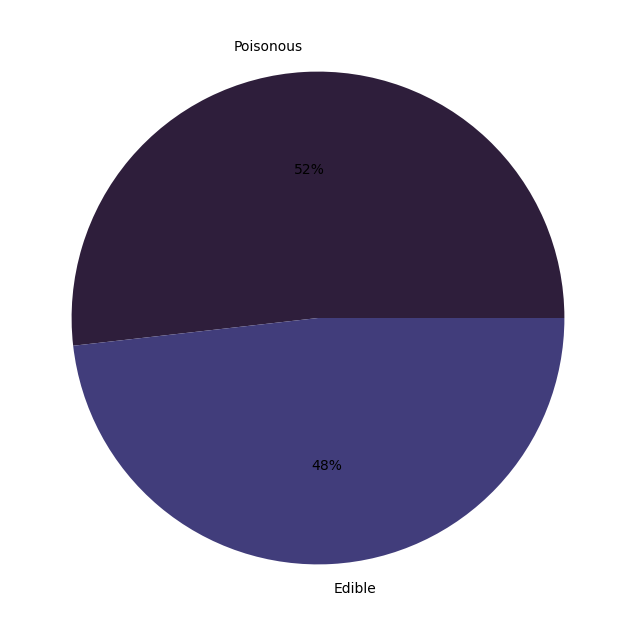

In [21]:
# to get the percentage of each label of the class
classLabelsCounts = mushrooms_df["class"].value_counts()
print(classLabelsCounts)

colors = sns.color_palette('mako')
plt.figure(figsize=(8, 8))
plt.pie(classLabelsCounts , labels = ["Poisonous", "Edible"], colors = colors, autopct = "%.0f%%")
plt.show()

In [22]:
# Showing for the Edible class
ed= mushrooms_df[mushrooms_df['class']=='e']

#### Visualizing features
- all features are categorical with an assortment of values
- some features are mostly evenly spread per the samples like cap surface
- some features like odor have clear majority values, possible correlation to edible or poisonous? 

In [82]:
features=mushrooms_df.drop(columns='class')

#creating a function to countplot features to see breakout, input column name
                       
def featureplot(col):
    sns.set_style('white')
    plt.figure()
    sns.countplot(x=col, data=features, alpha=0.80)
    plt.ylabel('# of samples')
    plt.title('Mushroom' + ' ' + col.title())
    plt.xlabel('Type of' + ' ' + col.title())
    

    plt.show() 
                        

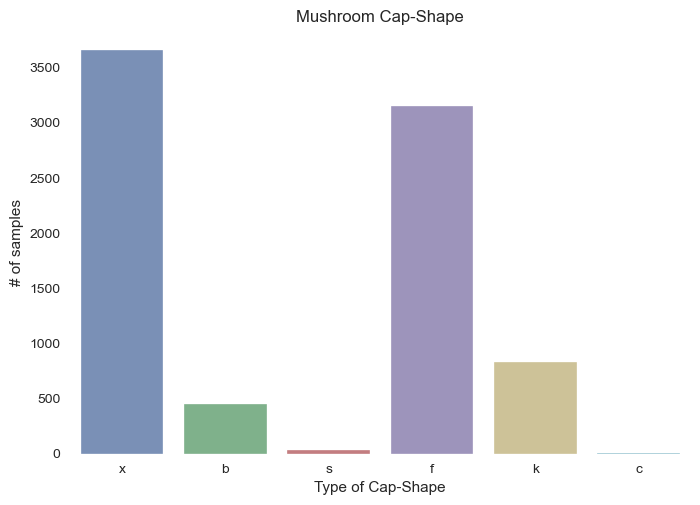

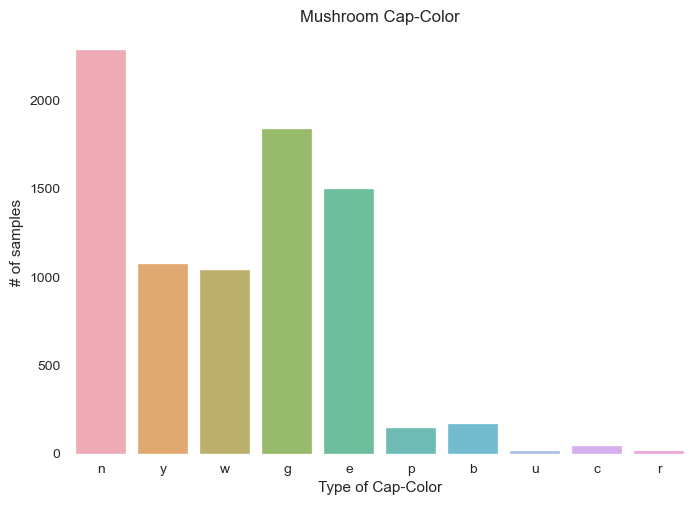

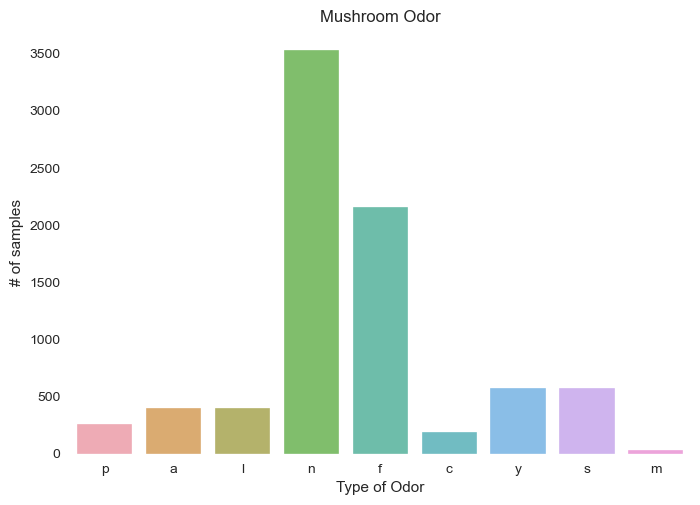

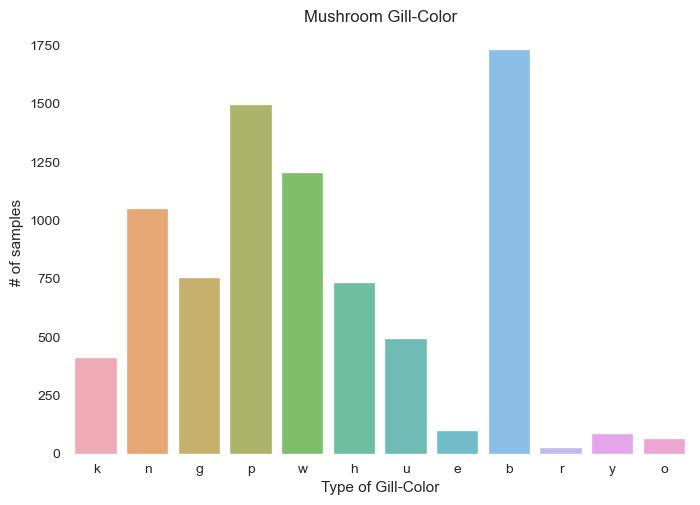

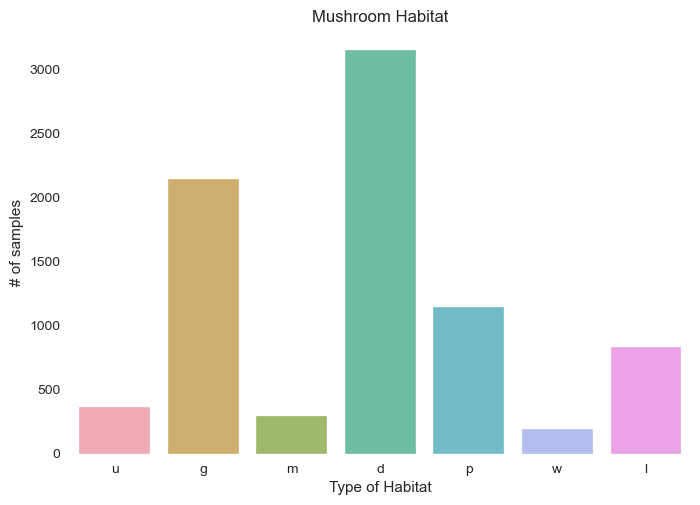

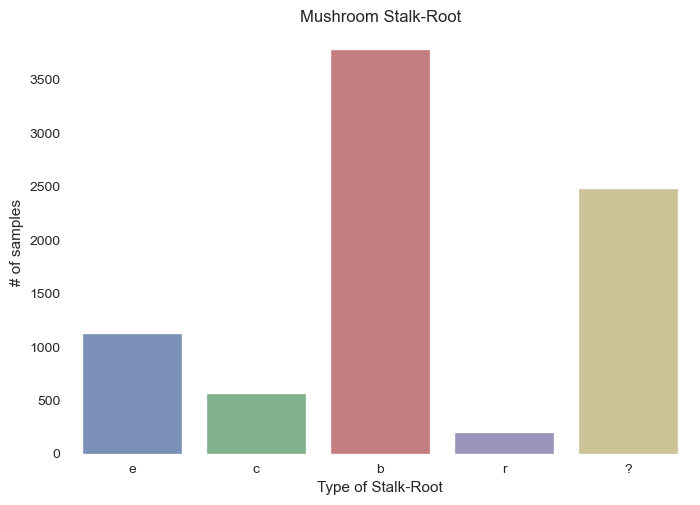

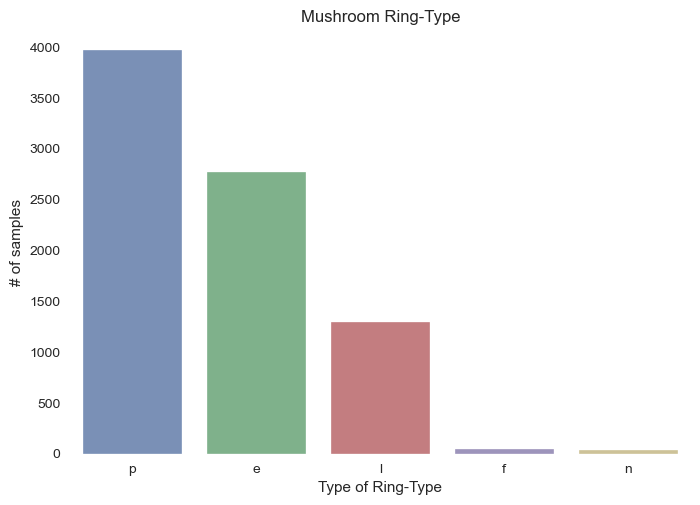

In [83]:
featureplot('cap-shape')
featureplot('cap-color')
featureplot('odor')
featureplot('gill-color')
featureplot('habitat')
featureplot('stalk-root')
featureplot('ring-type')


#### Visualizing feature/class separation - what do the relationships look like between a feature's values and whether the mushroom is edible or poisonous?
- population, gill color, odor, surface above/below ring, spore print color all have dominant values which show seperation between classes
- gill-attachment and veil-color hardly show any value seperation with class

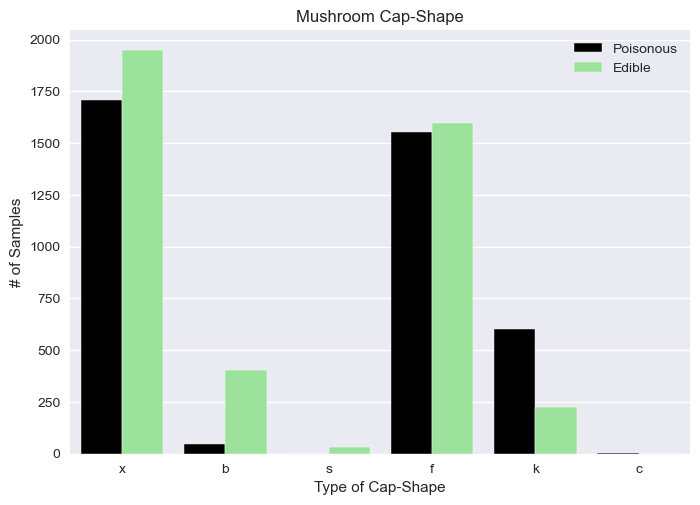

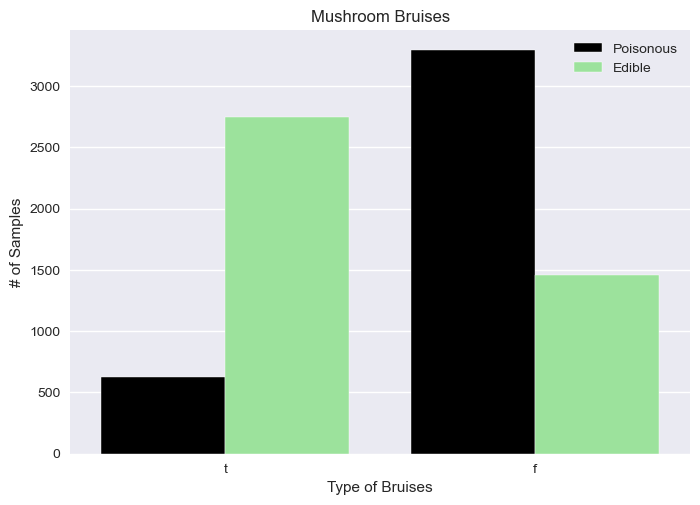

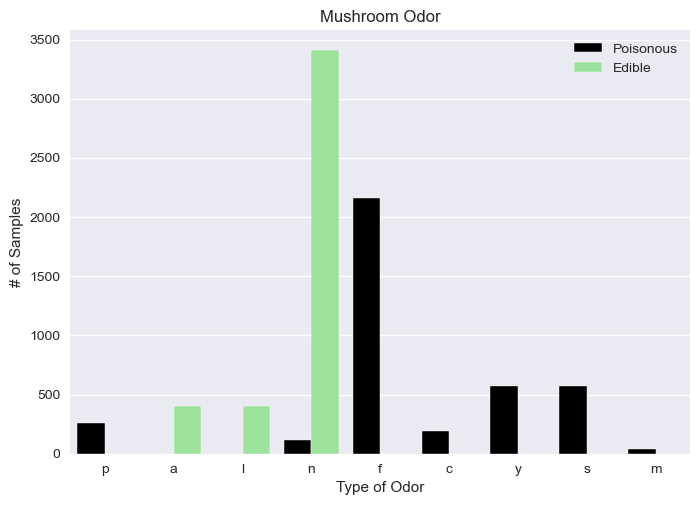

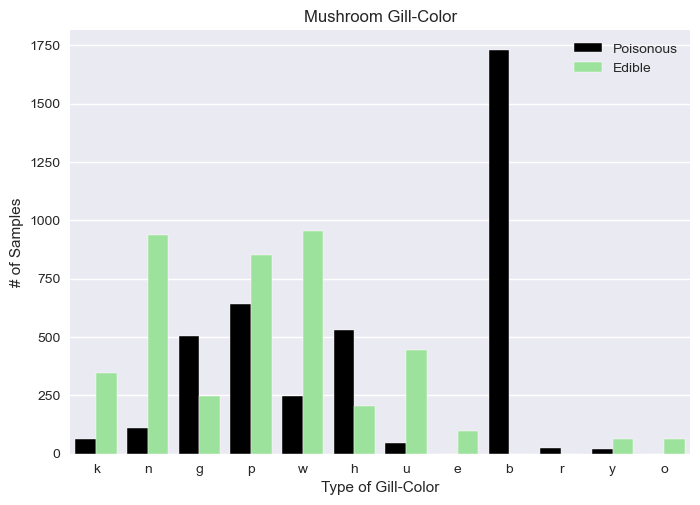

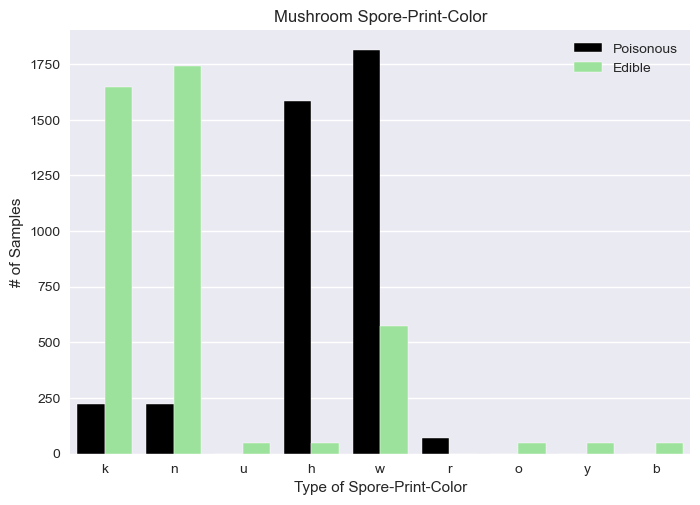

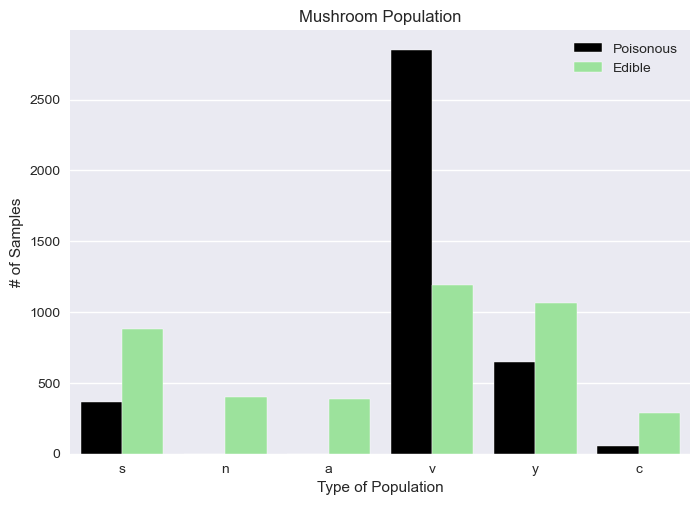

In [35]:
#creating function to create countplots for features stacked with class

def featureclassplot(col):
    fig,ax=plt.subplots()
    sns.set_style('darkgrid')
    sns.countplot(x=col, hue='class', data=mushrooms_df, palette=['black', 'lightgreen'])
    plt.ylabel('# of Samples')
    plt.xlabel('Type of' + ' ' + col.title())
    plt.title('Mushroom' + ' ' + col.title())
    plt.legend(title=None,labels=['Poisonous','Edible'])
    plt.show()
    
featureclassplot('cap-shape')
featureclassplot('bruises')
featureclassplot('odor')
featureclassplot('gill-color')
featureclassplot('spore-print-color')
featureclassplot('population')


## Feature Engineering

### Converting all the columns into integer format to feed the data into the model

In [38]:
le=LabelEncoder()
mushrooms_df=mushrooms_df.apply(LabelEncoder().fit_transform)   
mushrooms_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [ ]:
#1-poisonous
#2-edible

In [42]:
# Splitting the data into x and y variables
x=mushrooms_df.drop(['class'],axis=1)
y=mushrooms_df['class']

In [41]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2


In [43]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


## Model Building
### We can use 
1. Dession Tree
2. Logistic regression


### 1.Dession Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
model= DecisionTreeClassifier()

In [64]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [65]:
model.score(x_train,y_train)

1.0

In [66]:
model.score(x_test,y_test)

1.0

In [67]:
y_predict=model.predict(x_test)

In [68]:
y_predict

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [69]:
d1=pd.DataFrame({'Actual':y_test,'Predicted':y_predict})

In [70]:
d1

,Actual,Predicted
380,1,1
3641,0,0
273,0,0
1029,0,0
684,0,0
...,...,...
520,0,0
36,0,0
7959,1,1
6520,1,1


In [74]:
con_matrix = confusion_matrix(y_test,y_predict)
print(con_matrix)

[[1272    0]
 [   0 1166]]


Text(50.722222222222214, 0.5, 'actual')

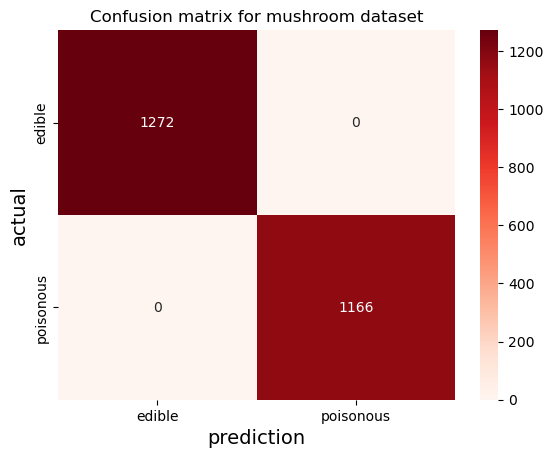

In [78]:
label = ['edible','poisonous']
ax= sns.heatmap(con_matrix, annot=True,fmt='d',cmap='Reds',xticklabels=label,yticklabels=label)
ax.set_title('Confusion matrix for mushroom dataset')
ax.set_xlabel('prediction', fontsize=14)
ax.set_ylabel('actual',fontsize=14)

In [73]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



### 2.Logistic Regression

In [79]:
model = LogisticRegression()

In [80]:
model.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
model.score(x_test,y_test)

0.9491386382280558

In [82]:
y_predict = model.predict(x_test)

In [83]:
y_predict

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

### Accuracy Score

In [84]:
accuracy_score(y_test,y_predict)

0.9491386382280558

### Confusion matrix and Report

In [51]:
con_matrix = confusion_matrix(y_test,y_predict)
print(con_matrix)

array([[1222,   50],
       [  74, 1092]], dtype=int64)

Text(50.722222222222214, 0.5, 'actual')

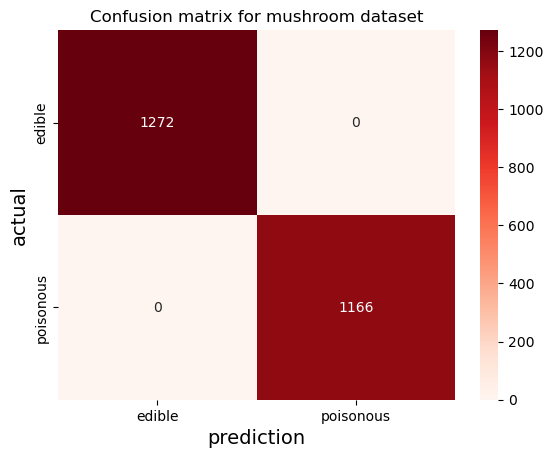

In [85]:
label = ['edible','poisonous']
ax= sns.heatmap(con_matrix, annot=True,fmt='d',cmap='Reds',xticklabels=label,yticklabels=label)
ax.set_title('Confusion matrix for mushroom dataset')
ax.set_xlabel('prediction', fontsize=14)
ax.set_ylabel('actual',fontsize=14)

In [86]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1272
           1       0.96      0.94      0.95      1166

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



## Conclusion

From the above models we can conclude that Decision Tree has the highest accuracy.

And finally a few simple rules for identifying a poisonous mushroom (as learned from studying the feauture importance ranks of my DTC, RFC and EDA):

1. *Odor: If the Mushroom has an odor, especially if the odor is not pleasant, it is likely to be poisonous.
2. Gill Size: If the gills are narrow, it is likely to be poisonous.
3. Spore Print Color: White, red, 'chocolate' are likely to be poisonous. 
4. Bruises: If the mushroom does not have bruises, it is likely to be poisonous. 
5. Stalk Surface Above Ring: If it appears silky, it is likely to be poisonous. 